### How to summarize data and find pattern

- Central tendency
    - Mean
    - Median
    - Mode

- Dispersion
    - Range
    - Variance
    - Min, Max
    - Quartiles - include the interquartile range
    - Standard deviation

- Count/Null Count

In [2]:
# import libraries

import os
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# check woring directory

os.getcwd()

'/Users/pnatzz/basicPython'

In [27]:
# import csv data to a dataframe

src = os.getcwd()

data = pd.read_csv(src + '/files/Advertising.csv', header = 0, index_col = 0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [28]:
data.shape

(200, 4)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [30]:
# get a summary

data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Review data

- There is no missing value
- There is a dispersion from 218.825 to 296.400 in TV column and 45.100 to 114.000 in Newspaper column
- There are gap between min and max of all columns which maybe scew or there is the outlier

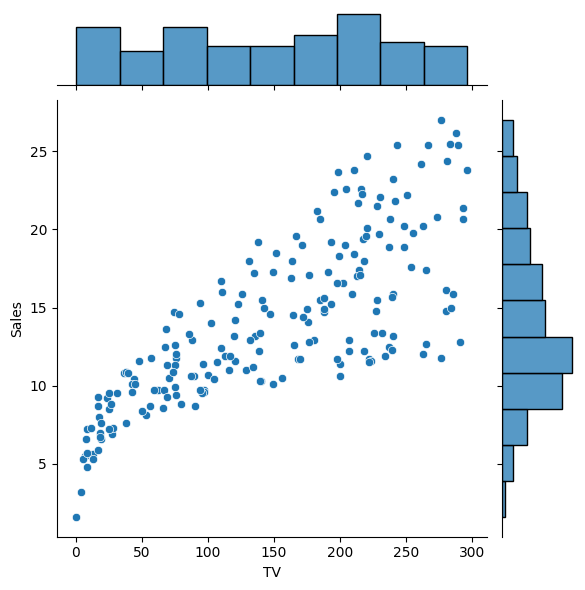

In [32]:
sns.jointplot(data = data, x = 'TV', y = 'Sales');

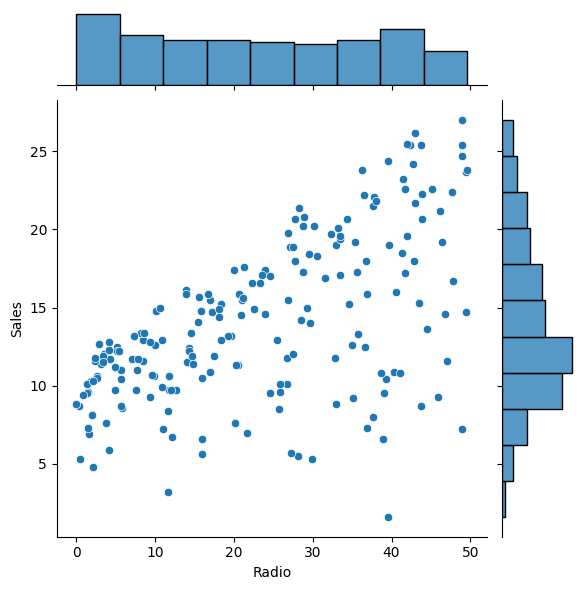

In [33]:
sns.jointplot(data = data, x = 'Radio', y = 'Sales');

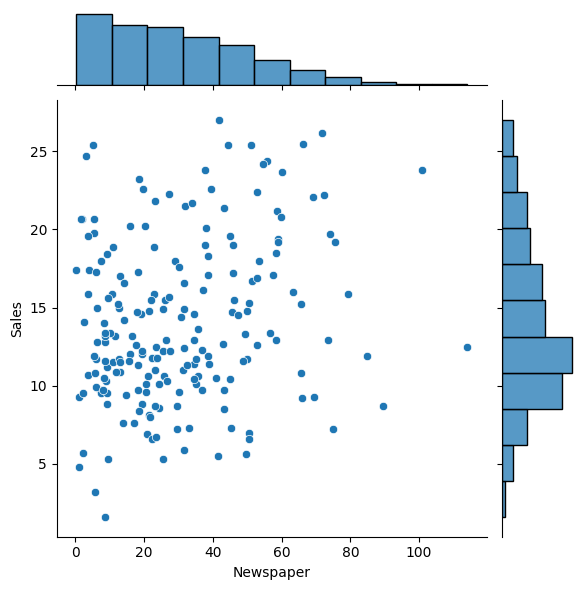

In [34]:
sns.jointplot(data = data, x = 'Newspaper', y = 'Sales');

In [35]:
# *** For the catigorical variable, we can use countplot the review data ***

### Review data

- There are 2 outlier data in TV
- There is scewness in Sales

### Outlier treatment

In [36]:
# let's see the value at the 99 percentile

np.percentile(data.TV, [99])

array([292.907])

In [38]:
# specify the location of the array

np.percentile(data.TV, [99]).shape

(1,)

In [39]:
# fetch the 1st element of  an array

np.percentile(data.TV, [99])[0]

292.907

In [40]:
# save value at 99 percentile to the uv (upper value) variable

uv = np.percentile(data.TV, [99])[0]
uv

292.907

In [41]:
# get above uv data

data[(data.TV > uv)]

,TV,Radio,Newspaper,Sales
43,293.6,27.7,1.8,20.7
102,296.4,36.3,100.9,23.8


In [42]:
len(data[(data.TV > uv)])

2

In [ ]:
# eliminate the value of above uv - impute all the values above 3P99 or below 0.3P1, btw we can use any multiplier instead of 3 depending on the business

data.TV[(data.TV > 3*uv)] = 3*uv

In [44]:
# check data

data[(data.TV) > uv]

,TV,Radio,Newspaper,Sales
43,293.6,27.7,1.8,20.7
102,296.4,36.3,100.9,23.8


In [45]:
# 1st percentile

np.percentile(data.TV, [1])

array([5.387])

In [46]:
# fetch the 1st element of  an array

np.percentile(data.TV, [1])[0]

5.3870000000000005

In [47]:
# save value at 99 percentile to the uv (upper value) variable

lv = np.percentile(data.TV, [1])[0]
lv

5.3870000000000005

In [ ]:
# get below lv data

data[(data.TV < lv)]

,TV,Radio,Newspaper,Sales
131,0.7,39.6,8.7,1.6
156,4.1,11.6,5.7,3.2


In [50]:
# how many data , lv

len(data[(data.TV < lv)])

2

In [ ]:
# handle the value of below lv - impute all the values above 3P99 or below 0.3P1, btw we can use any multiplier instead of 3 depending on the business

data.TV[(data.TV < 3*lv)] = 3*lv

In [52]:
data[(data.TV < lv)]

,TV,Radio,Newspaper,Sales


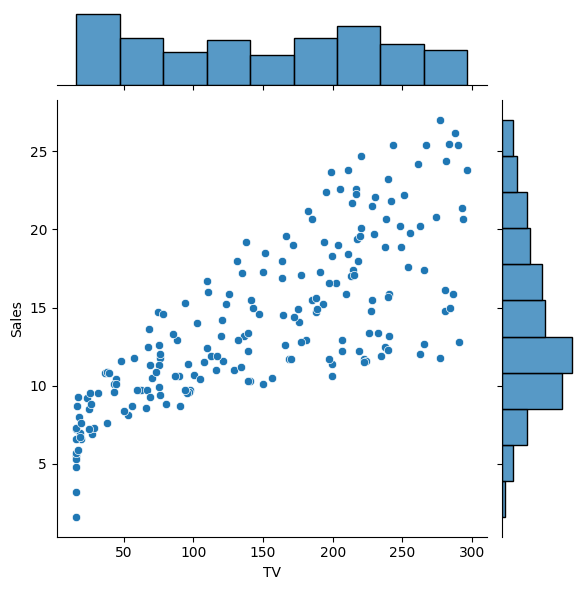

In [53]:
sns.jointplot(data = data, x = 'TV', y = 'Sales');

In [54]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.486355,23.264000,30.554000,14.022500
std,85.144950,14.846809,21.778621,5.217457
min,16.161000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [55]:
# For missing value, we can do missing value imputation